<a href="https://colab.research.google.com/github/Lawkage1/AI-Driven-Network-Failure-Prediction/blob/main/AIdrivenProj(LR%2CDT%2CKNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Logistic Regression**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#loading in the already cleaned data
url = 'https://raw.githubusercontent.com/adrish20/final_data/refs/heads/main/data%20final.csv'
data= pd.read_csv(url, on_bad_lines='skip')
data.head()

,Sr.No.,Locality,Signal Strength (dBm),Data Throughput (Mbps),Latency (ms),Network Type,BB60C Measurement (dBm),srsRAN Measurement (dBm),BladeRFxA9 Measurement (dBm)
0,1,Fraser Road,-97.653121,5.132296,54.883606,4G,-95.810791,-105.452359,-99.920892
1,2,Boring Canal Road,-87.046134,1.176985,119.598286,LTE,-91.593861,-95.419482,-87.714070
2,3,Danapur,-94.143159,68.596932,46.598387,5G,-90.642773,-101.895905,-96.570698
3,4,Phulwari Sharif,-94.564765,38.292038,30.342828,5G,-90.489100,-103.318303,-95.102467
4,5,Bankipore,-91.196029,1.712596,190.682844,LTE,-93.474707,-97.957579,-94.192907


In [ ]:
data['Failure'] = (
    (data['Signal Strength (dBm)'] < -93) |
    (
        (data['BB60C Measurement (dBm)'] < -93) &
        (data['srsRAN Measurement (dBm)'] < -93) &
        (data['BladeRFxA9 Measurement (dBm)'] < -93) &
        (data['Latency (ms)'] > 90)
    )
).astype(int)
data.head(200)

,Sr.No.,Locality,Signal Strength (dBm),Data Throughput (Mbps),Latency (ms),Network Type,BB60C Measurement (dBm),srsRAN Measurement (dBm),BladeRFxA9 Measurement (dBm),Failure
0,1,Fraser Road,-97.653121,5.132296,54.883606,4G,-95.810791,-105.452359,-99.920892,1
1,2,Boring Canal Road,-87.046134,1.176985,119.598286,LTE,-91.593861,-95.419482,-87.714070,0
2,3,Danapur,-94.143159,68.596932,46.598387,5G,-90.642773,-101.895905,-96.570698,1
3,4,Phulwari Sharif,-94.564765,38.292038,30.342828,5G,-90.489100,-103.318303,-95.102467,1
4,5,Bankipore,-91.196029,1.712596,190.682844,LTE,-93.474707,-97.957579,-94.192907,1
...,...,...,...,...,...,...,...,...,...,...
195,196,Boring Canal Road,-88.036339,7.327995,89.073104,4G,-86.003566,-93.864047,-90.699055,0
196,197,Phulwari Sharif,-91.675355,32.804146,45.803062,5G,-90.936064,-99.921467,-89.679192,0
197,198,Anandpuri,-98.824859,28.505934,34.547328,5G,-101.593995,-106.096515,-97.721008,1
198,199,Kidwaipuri,-91.950821,2.311642,153.727567,LTE,-90.179579,-98.537466,-91.178417,0


In [ ]:
#feature engineering
data = pd.get_dummies(data,columns=['Network Type'],drop_first = True)
data.head(10)

,Sr.No.,Locality,Signal Strength (dBm),Data Throughput (Mbps),Latency (ms),BB60C Measurement (dBm),srsRAN Measurement (dBm),BladeRFxA9 Measurement (dBm),Failure,Network Type_5G,Network Type_LTE
0,1,Fraser Road,-97.653121,5.132296,54.883606,-95.810791,-105.452359,-99.920892,1,False,False
1,2,Boring Canal Road,-87.046134,1.176985,119.598286,-91.593861,-95.419482,-87.714070,0,False,True
2,3,Danapur,-94.143159,68.596932,46.598387,-90.642773,-101.895905,-96.570698,1,True,False
3,4,Phulwari Sharif,-94.564765,38.292038,30.342828,-90.489100,-103.318303,-95.102467,1,True,False
4,5,Bankipore,-91.196029,1.712596,190.682844,-93.474707,-97.957579,-94.192907,1,False,True
5,6,Kidwaipuri,-85.653092,4.036609,99.887024,-87.985282,-90.770017,-86.186870,0,False,False
6,7,Phulwari Sharif,-85.980052,2.670605,132.078006,-89.114867,-95.776177,-85.434695,0,False,True
7,8,Gardanibagh,-96.842118,2.992507,196.541935,-96.259184,-102.428937,-98.709876,1,False,True
8,9,S.K. Puri,-90.308407,9.244326,81.556931,-87.360294,-97.795221,-89.846984,0,False,False
9,10,Pataliputra,-88.635392,1.588898,138.509773,-85.124025,-97.050782,-90.618436,0,False,True


In [ ]:
data_cleaned = data.replace({False:0,True:1})

<ipython-input-6-bc0bca64a565>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_cleaned = data.replace({False:0,True:1})


In [ ]:
df = data_cleaned.drop(columns=['Sr.No.','Locality'])

In [ ]:
X = df.drop(columns=['Failure'])
y = df['Failure']

In [ ]:
#splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(9466, 8) (9466,)
(3156, 8) (3156,)


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [ ]:
#preprocessing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

In [ ]:
df.head()

,Signal Strength (dBm),Data Throughput (Mbps),Latency (ms),BB60C Measurement (dBm),srsRAN Measurement (dBm),BladeRFxA9 Measurement (dBm),Failure,Network Type_5G,Network Type_LTE
0,-97.653121,5.132296,54.883606,-95.810791,-105.452359,-99.920892,1,0,0
1,-87.046134,1.176985,119.598286,-91.593861,-95.419482,-87.714070,0,0,1
2,-94.143159,68.596932,46.598387,-90.642773,-101.895905,-96.570698,1,1,0
3,-94.564765,38.292038,30.342828,-90.489100,-103.318303,-95.102467,1,1,0
4,-91.196029,1.712596,190.682844,-93.474707,-97.957579,-94.192907,1,0,1


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

#setting up logistic regression with gridsearchCV for hyperparameter tuning
logreg = LogisticRegression(max_iter = 1000, random_state=42)
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(logreg,param_grid,cv=10) #1 for validation set and 9 for training set
grid_search.fit(X_train_scaled,y_train)


GridSearchCV(cv=10,
             estimator=LogisticRegression(max_iter=1000, random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]})

In [ ]:
logreg_best = grid_search.best_estimator_
logreg_best

LogisticRegression(C=100, max_iter=1000, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
y_pred = logreg_best.predict(X_test_scaled)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9759188846641318
Precision: 0.9696243005595524
Recall: 0.9696243005595524
F1 Score: 0.9696243005595524
Confusion Matrix:
 [[1867   38]
 [  38 1213]]


#**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier

DecisionTreeClassifier(random_state=42)

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
grid_search_dt = GridSearchCV(dt_classifier,param_grid,cv=10)
grid_search_dt.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [ ]:
best_dt_classifier = grid_search_dt.best_estimator_

In [ ]:
y_pred = best_dt_classifier.predict(X_test)
y_pred[2]

1

In [ ]:
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[1512    0]
 [   0 1013]]


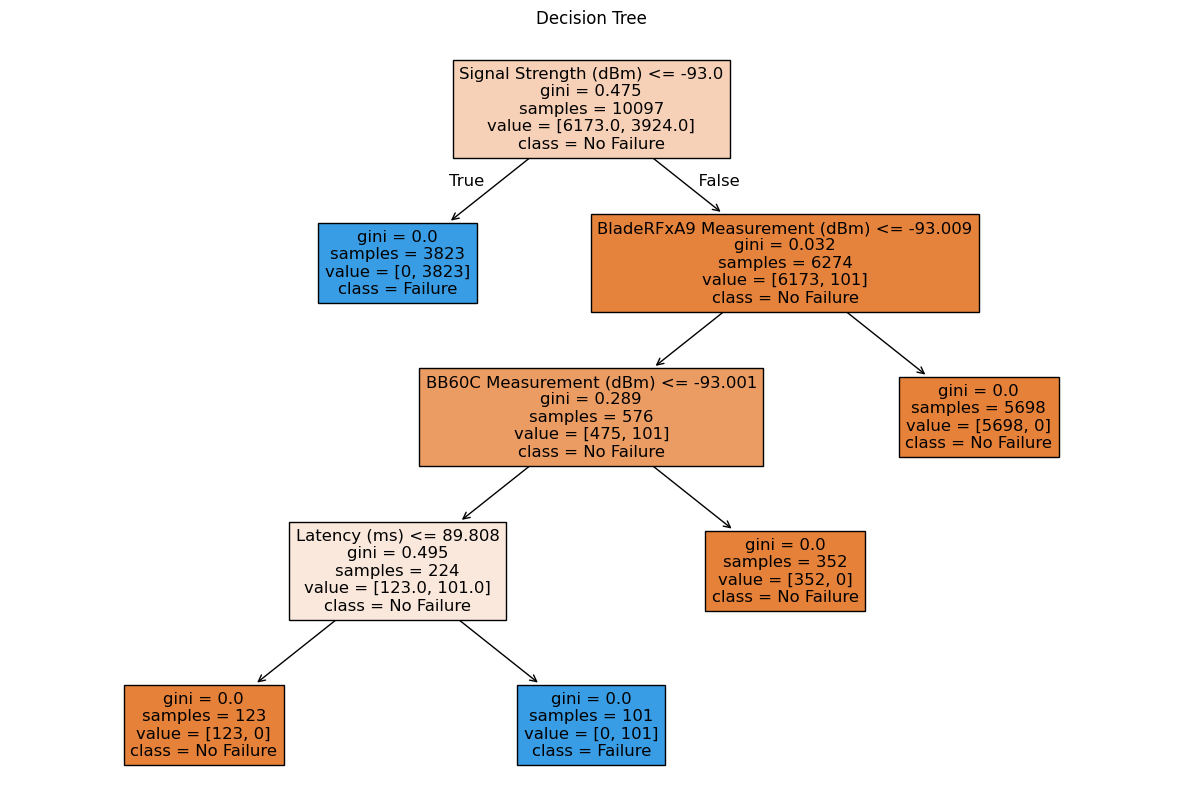

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10))
plot_tree(best_dt_classifier,filled=True, feature_names=X.columns,class_names=['No Failure','Failure'])
plt.title('Decision Tree')
plt.show();

#**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
#preprocessing the data
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [ ]:
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']})

In [ ]:
knn_best = grid_search.best_estimator_
knn_best

KNeighborsClassifier(metric='manhattan', n_neighbors=9, weights='distance')

In [ ]:
y_pred = knn_best.predict(X_test_scaled)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9775031685678074
Precision: 0.9697452229299363
Recall: 0.973621103117506
F1 Score: 0.9716792979656961
Confusion Matrix:
 [[1867   38]
 [  33 1218]]
